In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as color
pio.templates.default = "plotly_white"

In [6]:
data = pd.read_csv("croma.csv")
data
data.describe()



,Postal Code,Sales,Quantity,Discount,Profit
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,418531.000000,3010.009400,5.600000,0.147000,369.490400
std,166656.572725,2221.270019,2.860388,0.111423,290.727971
min,110001.000000,162.160000,1.000000,0.000000,20.870000
25%,302001.000000,1110.447500,3.000000,0.075000,149.800000
50%,411001.000000,2622.585000,6.000000,0.100000,298.240000
75%,560001.000000,4086.725000,8.000000,0.200000,488.407500
max,700001.000000,9737.780000,10.000000,0.300000,1478.460000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       100 non-null    object 
 1   Order Date     100 non-null    object 
 2   Ship Date      100 non-null    object 
 3   Ship Mode      100 non-null    object 
 4   Customer ID    100 non-null    object 
 5   Customer Name  100 non-null    object 
 6   Segment        100 non-null    object 
 7   Country        100 non-null    object 
 8   City           100 non-null    object 
 9   Postal Code    100 non-null    int64  
 10  Product ID     100 non-null    object 
 11  Category       100 non-null    object 
 12  Sub-Category   100 non-null    object 
 13  Product Name   100 non-null    object 
 14  Sales          100 non-null    float64
 15  Quantity       100 non-null    int64  
 16  Discount       100 non-null    float64
 17  Profit         100 non-null    float64
dtypes: float64(

In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       100 non-null    object        
 1   Order Date     100 non-null    datetime64[ns]
 2   Ship Date      100 non-null    object        
 3   Ship Mode      100 non-null    object        
 4   Customer ID    100 non-null    object        
 5   Customer Name  100 non-null    object        
 6   Segment        100 non-null    object        
 7   Country        100 non-null    object        
 8   City           100 non-null    object        
 9   Postal Code    100 non-null    int64         
 10  Product ID     100 non-null    object        
 11  Category       100 non-null    object        
 12  Sub-Category   100 non-null    object        
 13  Product Name   100 non-null    object        
 14  Sales          100 non-null    float64       
 15  Quantity       100 non-n

In [18]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [19]:
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,871b7335,2024-11-29,12/5/2024,Same Day,72c8b3,Damini Dada,Corporate,India,Chennai,600001,...,Technology,Phones,Phones - Porro,838.99,2,0.3,126.78,11,2024,4
1,14d770c7,2024-09-03,9/6/2024,First Class,082a93,Aradhya Mahal,Corporate,India,Lucknow,226001,...,Furniture,Chairs,Chairs - Repellat,846.09,8,0.3,93.07,9,2024,1
2,82326bab,2025-06-07,6/10/2025,Standard Class,542cd7,Saira Chakrabarti,Home Office,India,Jaipur,302001,...,Office Supplies,Paper,Paper - Rem,2660.96,7,0.0,485.81,6,2025,5
3,1.32E+235,2025-04-08,4/11/2025,First Class,b9ac5b,Divit Balan,Corporate,India,Pune,411001,...,Office Supplies,Pens,Pens - Qui,3921.13,8,0.3,270.08,4,2025,1
4,ee968646,2025-03-22,3/29/2025,First Class,8b65b7,Akarsh Taneja,Corporate,India,Jaipur,302001,...,Technology,Phones,Phones - Harum,849.25,3,0.1,93.63,3,2025,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,c9681956,2024-07-17,7/24/2024,Second Class,67ad32,Krish Devi,Corporate,India,Kolkata,700001,...,Technology,Accessories,Accessories - Iusto,2744.64,3,0.2,390.76,7,2024,2
96,fca7edd8,2024-08-07,8/14/2024,Standard Class,60f0c6,Divyansh Ganguly,Consumer,India,Pune,411001,...,Office Supplies,Pens,Pens - Nihil,4037.23,7,0.0,348.19,8,2024,2
97,cd1d3ac9,2024-08-01,8/4/2024,Second Class,be9f9a,Anahita Choudhary,Home Office,India,Delhi,110001,...,Furniture,Bookcases,Bookcases - Atque,457.60,2,0.2,88.87,8,2024,3
98,eb61df9f,2025-02-05,2/7/2025,Same Day,2.76E+10,Inaaya Borra,Corporate,India,Lucknow,226001,...,Technology,Accessories,Accessories - Ipsam,2845.81,4,0.0,693.19,2,2025,2


In [20]:
#Monthly Sales Analysis
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_month

,Order Month,Sales
0,1,22726.17
1,2,7733.13
2,3,16560.06
3,4,27549.94
4,5,55883.66
5,6,53381.66
6,7,23650.76
7,8,24033.48
8,9,22006.99
9,10,25033.45


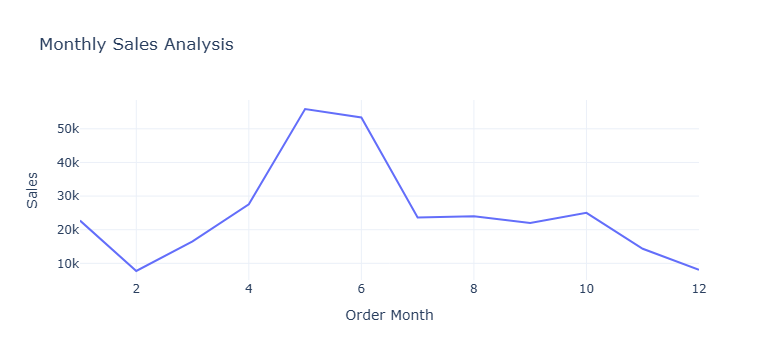

In [21]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month, x = 'Order Month', y = 'Sales', title = 'Monthly Sales Analysis')
fig.show()

In [22]:
#Sales by Category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,65272.28
1,Office Supplies,178483.97
2,Technology,57244.69


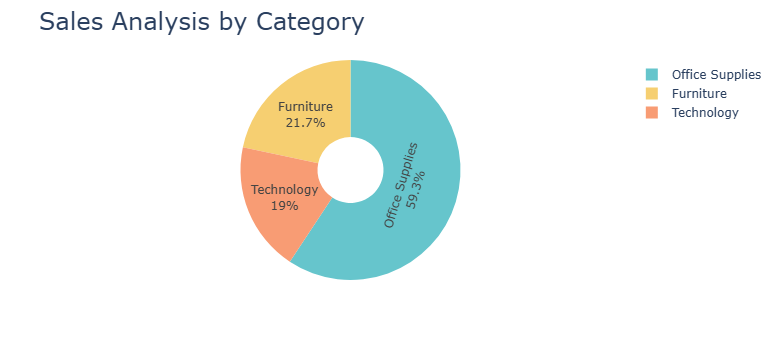

In [23]:
fig = px.pie(sales_by_category, values = 'Sales', names = 'Category', hole=.3,
            color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_traces(textposition = 'inside', textinfo='percent+label')
fig.update_layout(title_text = 'Sales Analysis by Category', title_font=dict(size=24))

fig.show()

In [24]:
#Profit by Sub Category
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_subcategory

,Sub-Category,Profit
0,Accessories,2716.42
1,Binders,7661.05
2,Bookcases,2811.10
3,Chairs,4012.82
4,Copiers,2879.64
5,Paper,6242.16
6,Pens,6162.61
7,Phones,3563.38
8,Tables,899.86


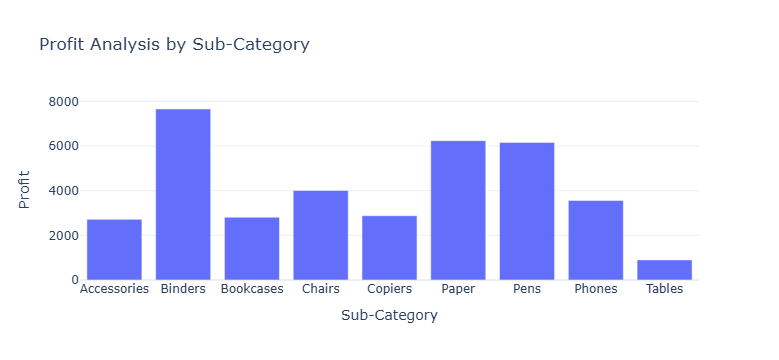

In [25]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x = 'Sub-Category', y = 'Profit', title = 'Profit Analysis by Sub-Category')
fig.show()

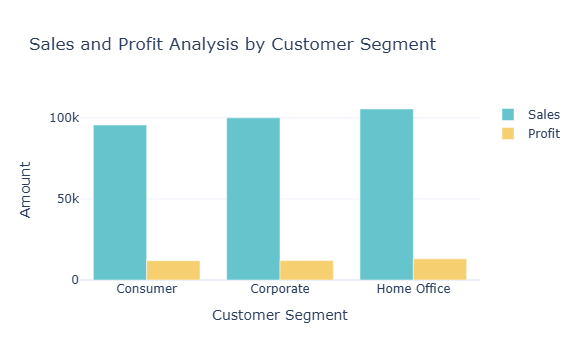

In [27]:
#Sales_profit_by_segment
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
color_palette = color.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x = sales_profit_by_segment['Segment'],
                    y = sales_profit_by_segment['Sales'],
                    name = 'Sales',
                    marker_color = color_palette[0]))
fig.add_trace(go.Bar(x = sales_profit_by_segment['Segment'],
                    y = sales_profit_by_segment['Profit'],
                    name = 'Profit',
                    marker_color = color_palette[1]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                 xaxis_title = 'Customer Segment', yaxis_title = 'Amount')
fig.show()

In [28]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.018735
1    Corporate               8.360506
2  Home Office               8.066883
